# author: Kevin Rohe
### version: 08/03/22
### 1D Bifurcation diagrams and illustration in ternary diagram
### made for thesis introduction
Import libraries and settings

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import ternary as ternary
from IPython.display import display, Markdown

plt.rcParams['font.size'] = 22
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})
cmap = 'rainbow'

## sympy-part

In [2]:
t,k1,k2,su,sv,F,Yu,Yv,pu,pv = sp.symbols("t k_1 k_2 s_u s_v F Y_u Y_v p_u p_v")#, real=True)
u,v,w = sp.symbols("u v w")#, real=True)

display(Markdown('### defining equation system'))
df = (Yu*F*su*(1-u-v) - k1*u - k2*u*v)
display(Markdown(r"$\frac{{du}}{{dt}}=$ {} $=0$".format(sp.latex(df, mode='inline'))))
dg = ((1-Yu)*F*sv*(1-u-v)**2 - k2*u*v)
display(Markdown(r"$\frac{{dv}}{{dt}}=$ {} $=0$".format(sp.latex(dg, mode='inline'))))
print()
display(Markdown('### solving in dependence for u, then for v'))
solu1 = sp.solve(df,u)[0]
display(Markdown(r"$u(v)=$ {}".format(sp.latex(solu1, mode='inline'))))
tempfac2 = (F*Yu*su+k1+k2*v)**2  #therefore following solution not allowed:  v = -(F*Y_u*s_u + k_1)/k_2
solv2 = sp.solve(sp.simplify(dg.subs(u,solu1))*tempfac2,v) #final solutions for v
display(Markdown(r"### and {} solutions for v with an average length of {} char in string".format(len(solv2),len(str(solv2[:]))/len(solv2))))

print()
display(Markdown('### solving in dependence for v, then for u'))
solv1 =sp.solve(df,v)[0]
display(Markdown(r"$v(u)=$ {}".format(sp.latex(solv1, mode='inline'))))
tempfac1 = (F*Yu*su+k2*u)**2 #therefore following solution not allowed: [-F*Y_u*s_u/k_2]
solu2 = sp.solve(sp.simplify(dg.subs(v,solv1))*tempfac1,u)
display(Markdown(r"### and {} solutions for u with an average length of {} char in string".format(len(solu2),len(str(solu2[:]))/len(solu2))))

### defining equation system

$\frac{du}{dt}=$ $F Y_{u} s_{u} \left(- u - v + 1\right) - k_{1} u - k_{2} u v$ $=0$

$\frac{dv}{dt}=$ $F s_{v} \left(1 - Y_{u}\right) \left(- u - v + 1\right)^{2} - k_{2} u v$ $=0$

### solving in dependence for u, then for v

$u(v)=$ $\frac{F Y_{u} s_{u} \left(1 - v\right)}{F Y_{u} s_{u} + k_{1} + k_{2} v}$

### and 4 solutions for v with an average length of 1748.25 char in string

### solving in dependence for v, then for u

$v(u)=$ $\frac{- F Y_{u} s_{u} u + F Y_{u} s_{u} - k_{1} u}{F Y_{u} s_{u} + k_{2} u}$

### and 4 solutions for u with an average length of 2328.75 char in string

In [4]:
J = sp.zeros(2,2)
for i, fi in enumerate([df,dg]):
    for j, s in enumerate([u,v]):
        J[i,j] = sp.diff(fi, s)
J = sp.simplify(J)

display(Markdown(r"### Jacobian matrix for stability analysis $J =$"))
display(J)

T = sp.simplify(sp.trace(J))
display(Markdown(r"Trace =  {}".format(sp.latex(T, mode='inline'))))
D = sp.simplify(sp.det(J))
display(Markdown(r"Determinant =  {}".format(sp.latex(D, mode='inline'))))

### Jacobian matrix for stability analysis $J =$

Matrix([
[              -F*Y_u*s_u - k_1 - k_2*v,                     -F*Y_u*s_u - k_2*u],
[-2*F*s_v*(Y_u - 1)*(u + v - 1) - k_2*v, -2*F*s_v*(Y_u - 1)*(u + v - 1) - k_2*u]])

Trace =  $- F Y_{u} s_{u} - 2 F s_{v} \left(Y_{u} - 1\right) \left(u + v - 1\right) - k_{1} - k_{2} u - k_{2} v$

Determinant =  $2 F Y_{u} k_{1} s_{v} u + 2 F Y_{u} k_{1} s_{v} v - 2 F Y_{u} k_{1} s_{v} + F Y_{u} k_{2} s_{u} u - F Y_{u} k_{2} s_{u} v - 2 F Y_{u} k_{2} s_{v} u^{2} + 2 F Y_{u} k_{2} s_{v} u + 2 F Y_{u} k_{2} s_{v} v^{2} - 2 F Y_{u} k_{2} s_{v} v - 2 F k_{1} s_{v} u - 2 F k_{1} s_{v} v + 2 F k_{1} s_{v} + 2 F k_{2} s_{v} u^{2} - 2 F k_{2} s_{v} u - 2 F k_{2} s_{v} v^{2} + 2 F k_{2} s_{v} v + k_{1} k_{2} u$

## figure setup

In [11]:
#dictionary with reaction parameter !!! not the most acurate way to do, but well enough
subdict = {su:1,sv:0.11,F:1.37/1.56,k1:1e13*sp.exp(-140000/(500*8.3145)),k2:1e5*sp.exp(-40000/(500*8.3145))}
#defining x-regime
x = np.linspace(49,101,6000*2+1)
maskx = (x%10==0)
x /= 1000.0


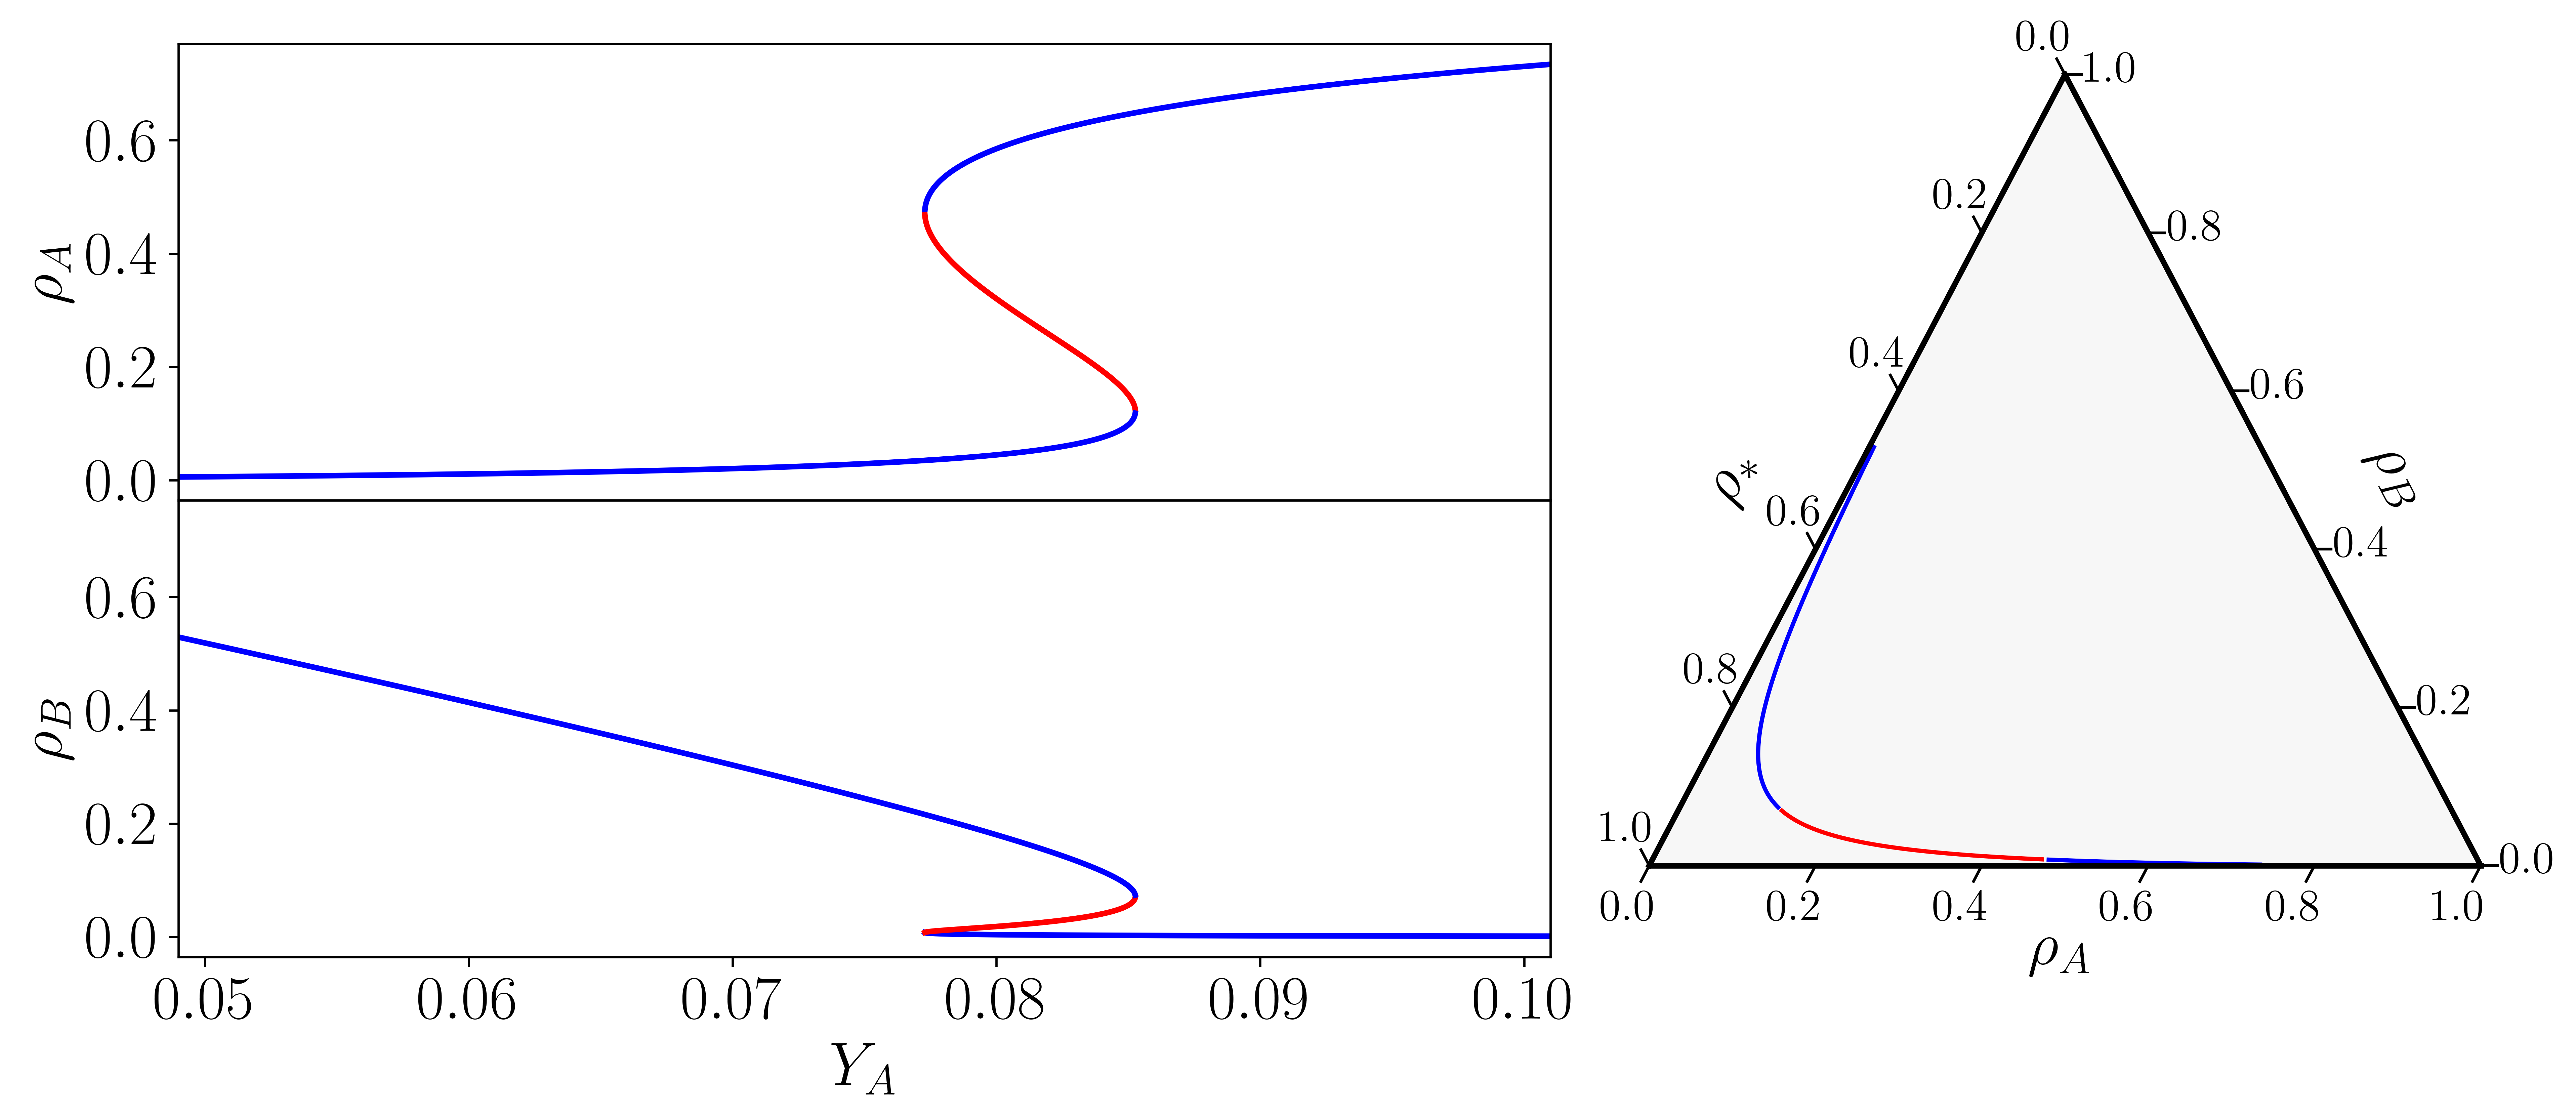

In [12]:
plt.rcParams['font.size'] = 22


fig = plt.figure(figsize=(15,6),dpi=600)
#Layout
gs0 = fig.add_gridspec(1, 2,wspace=0.05, hspace=0.05,width_ratios=[3,2])
gs00 = gs0[0,1].subgridspec(1,1)
gs01 = gs0[0,0].subgridspec(2,1,hspace=0.0)
ax1 = fig.add_subplot(gs01[0,0])
ax2 = fig.add_subplot(gs01[1,0], sharey=ax1)
ax3 = fig.add_subplot(gs00[0])
figure, tax = ternary.figure(ax=ax3)

for func in solv2[1:]:
    #lambdify v & u & using analytical expressions (and subdict) and using numerical u&v as variable for T&D (as well as Yu) 
    lamv = sp.lambdify([Yu],func.subs(subdict),'numpy')
    lamu = sp.lambdify([Yu],solu1.subs(v,func).subs(subdict),'numpy')
    lamT = sp.lambdify([Yu,u,v],T.subs(subdict),'numpy')
    lamD = sp.lambdify([Yu,u,v],D.subs(subdict),'numpy')
    #calculating u,v,T,D ensuring input is complex
    vy = lamv(x+0j)
    uy = lamu(x+0j)
    zT = lamT(x,uy,vy)
    zD = lamD(x,uy,vy)
    
    mask = (np.abs(np.imag(vy))<1e-9) * (np.abs(np.imag(uy))<1e-10) * (np.real(vy)>=0) * (np.real(uy)>=0) #mask for real+positive u&v
    stab_mask = (np.real(zT)< 0) * (np.real(zD)< 0) # mask for stable solutions
    unstab_mask = ((np.real(zT)> 0) + (np.real(zD)>0)) # mask for unstable solutions
    #plotting line-figures
    ax1.plot(x[mask*stab_mask],(np.real(uy)[mask*stab_mask]),color='r',linewidth=2)
    ax2.plot(x[mask*stab_mask],(np.real(vy)[mask*stab_mask]),color='r',linewidth=2)
    ax1.plot(x[mask*unstab_mask],(np.real(uy)[mask*unstab_mask]),color='b',linewidth=2)
    ax2.plot(x[mask*unstab_mask],(np.real(vy)[mask*unstab_mask]),color='b',linewidth=2)
    
    #plotting ternary figure with scatterpoints for xmasked Yu
    try:
        tax.plot(list(zip(np.real(uy)[mask*stab_mask],np.real(vy)[mask*stab_mask])),color='r')
        tax.scatter(list(zip(np.real(uy)[mask*stab_mask*maskx],np.real(vy)[mask*stab_mask*maskx])), #list of points
                    c=x[mask*stab_mask*maskx],vmin=x.min(),vmax=x.max(),cmap=cmap)                  #colordefinition
    except(ValueError):
        try:
            tax.plot(list(zip(np.real(uy)[mask*unstab_mask],np.real(vy)[mask*unstab_mask])),color='b')
            tax.scatter(list(zip(np.real(uy)[mask*unstab_mask*maskx],np.real(vy)[mask*unstab_mask*maskx])),
                        c=x[mask*unstab_mask*maskx],vmin=x.min(),vmax=x.max(),cmap=cmap)            
        except(ValueError):
            pass

#beautify normal plots
ax2.set_xlabel(r"$Y_A$")#,fontsize=18)
ax1.set_ylabel(r"$\rho_A$")#,fontsize=18)
ax2.set_ylabel(r"$\rho_B$")#,fontsize=18)
ax1.set_xlim(0.049,0.101)
ax2.set_xlim(0.049,0.101)
ax1.set_xticks([])
ax1.set_yticks([.0,.2,.4,.6])
ax1.set_ylim(*ax1.get_ylim())
ax2.set_ylim(*ax2.get_ylim())
#add colorcoded vlines to fit with the ternary scatter-points
rgb = cm.get_cmap(cmap)((x-x.min())/(x-x.min()).max())[:, :3]
ax1.vlines(x[maskx],*ax1.get_ylim(),linestyles='dashed',colors=rgb[maskx])
ax2.vlines(x[maskx],*ax2.get_ylim(),linestyles='dashed',colors=rgb[maskx])
#beautify ternary plot
tax.left_axis_label(r'$\rho_{*}$',offset=0.15)#,fontsize=18)
tax.right_axis_label(r'$\rho_{B}$',offset=0.15)#,fontsize=18)
tax.bottom_axis_label(r'$\rho_{A}$')#,fontsize=18)

tax.ticks(axis='lbr', multiple=0.2, linewidth=1, tick_formats="%.1f", offset=0.02,fontsize=16)
tax.boundary(linewidth=2.0)
tax.get_axes().axis('off')
tax._redraw_labels()
plt.savefig("bifurcation.pdf", dpi=600, bbox_inches="tight")


In [465]:
from sympy import cse, latex

t,k1,k2,su,sv,Fu,Fv,pu,pv = sp.symbols("t k_1 k_2 s_A s_B Phi_A Phi_B p_A p_B", real=True, positive=True)
u,v,w = sp.symbols("rho_A rho_B w", real=True, positive=True)

display(Markdown('### defining equation system'))
df = (Fu*su*(1-u-v) - k1*u - k2*u*v)
display(Markdown(r"$\frac{{du}}{{dt}}=$ {} $=0$".format(sp.latex(df, mode='inline'))))
dg = (2*Fv*sv*(1-u-v)**2 - k2*u*v)
display(Markdown(r"$\frac{{dv}}{{dt}}=$ {} $=0$".format(sp.latex(dg, mode='inline'))))
print()
display(Markdown('### solving in dependence for u, then for v'))
solu1 = sp.solve(df,u)[0]
display(Markdown(r"$u(v)=$ {}".format(sp.latex(solu1, mode='inline'))))
tempfac2 = (Fu*su+k1+k2*v)**2  #therefore following solution not allowed:  v = -(F*Y_u*s_u + k_1)/k_2
solv2 = sp.solve(sp.simplify(dg.subs(u,solu1))*tempfac2,v) #final solutions for v
display(Markdown(r"### and {} solutions for v with an average length of {} char in string".format(len(solv2),len(str(solv2[:]))/len(solv2))))


### defining equation system

$\frac{du}{dt}=$ $\Phi_{A} s_{A} \left(- \rho_{A} - \rho_{B} + 1\right) - k_{1} \rho_{A} - k_{2} \rho_{A} \rho_{B}$ $=0$

$\frac{dv}{dt}=$ $2 \Phi_{B} s_{B} \left(- \rho_{A} - \rho_{B} + 1\right)^{2} - k_{2} \rho_{A} \rho_{B}$ $=0$

### solving in dependence for u, then for v

$u(v)=$ $\frac{\Phi_{A} s_{A} \left(1 - \rho_{B}\right)}{\Phi_{A} s_{A} + k_{1} + k_{2} \rho_{B}}$

### and 4 solutions for v with an average length of 1386.0 char in string

In [466]:
C0, C1, C2, C3, C4, C5 = sp.symbols("C_0 C_1 C_2 C_3 C_4 C_5")#, real=True)

sub = cse(solv2)[0]
sub

[(x0, Phi_A*k_2*s_A),
 (x1, Phi_B*s_B),
 (x2, 4*k_1*x1),
 (x3, 2*x1),
 (x4, -k_2*x3 + x0 + x2),
 (x5, 1/(Phi_B*s_B)),
 (x6, -x4*x5/(6*k_2)),
 (x7, k_1**2),
 (x8, k_2**(-2)),
 (x9, x7*x8),
 (x10, k_2**(-3)),
 (x11, x10*x4**3/(Phi_B**3*s_B**3)),
 (x12, Phi_A**2*k_2*s_A**2 + k_1*x0 - k_2*x2 + x3*x7),
 (x13, 1/(Phi_B**2*s_B**2)),
 (x14, x10*x12*x13*x4),
 (x15, -3*x12*x5*x8/2 + x13*x4**2*x8/4),
 (x16,
  (x11/8 - 9*x14/8 - 27*x9/2 + sqrt(-4*x15**3 + (x11/4 - 9*x14/4 - 27*x9)**2)/2)**(1/3)),
 (x17, x16/3),
 (x18, x15/(3*x16)),
 (x19, sqrt(3)*I/2),
 (x20, -x19 - 1/2),
 (x21, x19 - 1/2)]

In [456]:
equ = cse(solv2)[1]
for i in [21,20,19,18,17]:
    equ[1] = sp.simplify(equ[1].subs(sub[i][0],sub[i][1]))
    equ[2] = sp.simplify(equ[2].subs(sub[i][0],sub[i][1]))
    equ[3] = sp.simplify(equ[3].subs(sub[i][0],sub[i][1]))

for i in range(1,4):
    print(latex(sp.simplify(equ[i].subs(sub[16][0],C0).subs(sub[15][0],C1).subs(sub[6][0],C2))))


c0 = sub[16][1]
#display(sp.Eq(C0, sp.simplify(c0)))    
c0s = cse(sp.simplify(c0))
print(latex(sp.Eq(C0, c0s[1][0].subs(c0s[0][0][0],C3).subs(sub[16][0],C0).subs(sub[15][0],C1).subs(sub[6][0],C2))))
c0 = c0s[1][0].subs(c0s[0][0][0],C3).subs(sub[16][0],C0).subs(sub[15][0],C1).subs(sub[6][0],C2)
    
c1 = sub[15][1]
c1
for i in [13,12,8,7,5,3,2,1,0]:
    c1 = c1.subs(sub[i][0],sub[i][1])
c1 = c1.subs(sub[4][0],C5)
print(latex(sp.Eq(C1, sp.expand(c1))))   

c2 = sub[6][1]
for i in range(6)[::-1]:
    c2 = c2.subs(sub[i][0],sub[i][1]) #C0
print(latex(sp.Eq(C2, sp.simplify(c2))))

c3 = c0s[0][0][1]
#display(sp.Eq(C4, sp.simplify(c4)))    
for i in [14,13,11,10,9,8,7,3,2,1,0]:
    c3 = c3.subs(sub[i][0],sub[i][1]) #C0
c3 = c3.subs(sub[12][0],C4).subs(sub[4][0],C5)
print(latex(sp.Eq(C3, sp.expand(c3))))

c4 = sub[12][1]
c4
for i in [12,7,4,3,2,1,0]:
    c4 = c4.subs(sub[i][0],sub[i][1])
print(latex(sp.Eq(C4, sp.simplify(c4))))

c5 = sub[4][1]
c5
for i in [3,2,1,0]:
    c5 = c5.subs(sub[i][0],sub[i][1])
print(latex(sp.Eq(C5, sp.simplify(c5))))


- \frac{C_{0}}{3} + C_{2} - \frac{C_{1}}{3 C_{0}}
\frac{C_{0} \left(C_{0} + \sqrt{3} i C_{0} + 6 C_{2}\right) + C_{1} - \sqrt{3} i C_{1}}{6 C_{0}}
\frac{C_{0} \left(C_{0} - \sqrt{3} i C_{0} + 6 C_{2}\right) + C_{1} + \sqrt{3} i C_{1}}{6 C_{0}}
C_{0} = \frac{\sqrt[3]{C_{3} + \sqrt{- 64 C_{1}^{3} + C_{3}^{2}}}}{2}
C_{1} = \frac{C_{5}^{2}}{4 \Phi_{B}^{2} k_{2}^{2} s_{B}^{2}} - \frac{3 \Phi_{A}^{2} s_{A}^{2}}{2 \Phi_{B} k_{2} s_{B}} - \frac{3 \Phi_{A} k_{1} s_{A}}{2 \Phi_{B} k_{2} s_{B}} - \frac{3 k_{1}^{2}}{k_{2}^{2}} + \frac{6 k_{1}}{k_{2}}
C_{2} = - \frac{\Phi_{A} s_{A}}{6 \Phi_{B} s_{B}} - \frac{2 k_{1}}{3 k_{2}} + \frac{1}{3}
C_{3} = - \frac{9 C_{4} C_{5}}{\Phi_{B}^{2} k_{2}^{3} s_{B}^{2}} + \frac{C_{5}^{3}}{\Phi_{B}^{3} k_{2}^{3} s_{B}^{3}} - \frac{108 k_{1}^{2}}{k_{2}^{2}}
C_{4} = \Phi_{A}^{2} k_{2} s_{A}^{2} + \Phi_{A} k_{1} k_{2} s_{A} + 2 \Phi_{B} k_{1}^{2} s_{B} - 4 \Phi_{B} k_{1} k_{2} s_{B}
C_{5} = \Phi_{A} k_{2} s_{A} + 4 \Phi_{B} k_{1} s_{B} - 2 \Phi_{B} k_{2} s_{B}


In [468]:
equ = cse(solv2)[1]
for i in [21,20,19,18,17]:
    equ[1] = sp.simplify(equ[1].subs(sub[i][0],sub[i][1]))
    equ[2] = sp.simplify(equ[2].subs(sub[i][0],sub[i][1]))
    equ[3] = sp.simplify(equ[3].subs(sub[i][0],sub[i][1]))
for i in range(1,4):
    display(sp.expand(equ[i].subs(sub[16][0],C0).subs(sub[15][0],C1).subs(sub[6][0],C2)))


-C_0/3 + C_2 - C_1/(3*C_0)

C_0/6 + sqrt(3)*I*C_0/6 + C_2 + C_1/(6*C_0) - sqrt(3)*I*C_1/(6*C_0)

C_0/6 - sqrt(3)*I*C_0/6 + C_2 + C_1/(6*C_0) + sqrt(3)*I*C_1/(6*C_0)

In [463]:
display(sp.simplify(equ[1]))

-x15/(3*x16) - x16/3 + x6

([(x0, k_2**(-2)),
  (x1, 1/(Phi_B**2*s_B**2)),
  (x2, Phi_A*k_2*s_A),
  (x3, Phi_B*s_B),
  (x5, 4*k_1*x3),
  (x6, k_1**2),
  (x7, 2*x3),
  (x8, Phi_A**2*k_2*s_A**2 + k_1*x2 - k_2*x5 + x6*x7),
  (x9, 1/(Phi_B*s_B)),
  (x10, -k_2*x7 + x2 + x5),
  (x11, k_2**(-3))],
 [(C_3 + sqrt(C_3**2 - 64*x15**3))**(1/3)/2,
  x0*x1*x4**2/4 - 3*x0*x8*x9/2,
  -x10*x9/(6*k_2),
  -108*x0*x6 - 9*x1*x11*x12*x4 + x11*x4**3/(Phi_B**3*s_B**3),
  x8,
  x10])

In [438]:
cse([c4,c5])[1][0]

Phi_A**2*k_2*s_A**2 + k_1**2*x3 + k_1*x0 - k_2*x2